<a href="https://colab.research.google.com/github/zelaneroz/CWRU-CSDS/blob/main/csds133_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohithsairamreddy/salary-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-data


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [3]:
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]  # Finds the first CSV file
csv_path = os.path.join(path, csv_file)
df = pd.read_csv(csv_path)

# I. Initial Exploration & Data Cleaning

## A. Initial Exploration

Using the code below, we gathered the following information:


*   6704 rows, 6 columns
*   Columns: \[Age, Gender Education, Level, Job Title, Years of Experience]
* 2 rows are empty
* Found the number of missing values per column
* Summary Statistis for each column
* Unique Values for Columns 'Education' and 'Job Title'


In [4]:
# Load dataset (update with actual file path)
# 1️⃣ Check the first few rows
print("📌 First 5 Rows:")
print(df.head(), "\n")

# 2️⃣ Check the number of rows and columns
print("📌 Shape of the dataset (rows, columns):", df.shape, "\n")

# 3️⃣ Get column names
print("📌 Column Names:")
print(df.columns, "\n")

# 4️⃣ Get basic info about dataset (data types, non-null counts, memory usage)
print("📌 Dataset Information:")
print(df.info(), "\n")

📌 First 5 Rows:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0   

📌 Shape of the dataset (rows, columns): (6704, 6) 

📌 Column Names:
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object') 

📌 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  670

In [5]:
# 5️⃣ Check for missing values
print("📌 Missing Values Per Column:")
print(df.isnull().sum(), "\n")

# 6️⃣ Count completely empty rows
print("📌 Number of Fully Empty Rows:", df.isnull().all(axis=1).sum(), "\n")

# 7️⃣ Summary statistics for numerical columns
print("📌 Summary Statistics for Numerical Columns:")
print(df.describe(), "\n")

# 8️⃣ Summary statistics for categorical columns
print("📌 Summary Statistics for Categorical Columns:")
print(df.describe(include=['object']), "\n")

# 9️⃣ Check unique values in categorical columns (adjust column names as needed)
categorical_cols = ['Gender', 'Education Level', 'Job Title']  # Adjust these column names as necessary
for col in categorical_cols:
    if col in df.columns:
        print(f"📌 Unique values in '{col}':")
        print(df[col].value_counts(), "\n")

📌 Missing Values Per Column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64 

📌 Number of Fully Empty Rows: 2 

📌 Summary Statistics for Numerical Columns:
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000 

📌 Summary Statistics for Categorical Columns:
       Gender    Education Level          Job Title
count    6702               6701               6702
unique      3                  7                193
top      Male  Bachelor's Deg

## B. Data Cleaning

From the information gathered from data exploration, we perform the following to clean the data:

*   Remove rows where all columns are empty.
*   Removes rows where at least one column has missing data.
*   Reset the index to maintain a clean dataset.


In [6]:
print("Original Dataset Shape:", df.shape)
# Drop fully empty rows (where all columns are NaN)
df = df.dropna(how='all')

# Drop rows where at least one column has missing values
df = df.dropna(how='any')

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Display new shape of the dataset
print("Updated Dataset Shape:", df.shape)


Original Dataset Shape: (6704, 6)
Updated Dataset Shape: (6698, 6)


## C. Data Standardization

**Standardize Education Level Column**
* example, some have labels PhD while some have phD

In [7]:
# Clean and standardize the Education Level column
df['Education Level'] = df['Education Level'].str.strip().str.lower()

# Define a map for clean labels
education_clean_map = {
    "high school": "High School",
    "bachelor's": "Bachelor's",
    "bachelor's degree": "Bachelor's",
    "master's": "Master's",
    "master's degree": "Master's",
    "phd": "PhD",
    "ph.d": "PhD"
}

# Apply the mapping
df['Education Level'] = df['Education Level'].map(education_clean_map)

# Check results
print("✅ Cleaned Education Level values:\n", df['Education Level'].value_counts())


✅ Cleaned Education Level values:
 Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64


**Standardize Gender Column & Convert to Numeric**

In [8]:
# Convert to lowercase, strip spaces, and map to standardized values
gender_map = {
    'male': 'Male', 'm': 'Male', 'man': 'Male', 'boy': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female', 'girl': 'Female'
}

df['Gender'] = df['Gender'].str.strip().str.lower().map(gender_map)

# Remove rows with invalid or missing gender values
df = df[df['Gender'].isin(['Male', 'Female'])]

# Convert Gender to Numeric (Male = 1, Female = 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Confirm changes
print("✅ Gender column standardized and converted to numeric.")
print(df['Gender'].value_counts())


✅ Gender column standardized and converted to numeric.
Gender
1    3671
0    3013
Name: count, dtype: int64


**Convert Columns to Numeric**

In [9]:
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

**Handle Salary Outliers**

In [10]:
# Remove outliers using **IQR filtering**
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Salary'] >= Q1 - 1.5 * IQR) & (df['Salary'] <= Q3 + 1.5 * IQR)]

In [11]:
# Store original number of rows before filtering
original_rows = df.shape[0]

# Compute IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers before removing them
outliers = df[(df['Salary'] < Q1 - 1.5 * IQR) | (df['Salary'] > Q3 + 1.5 * IQR)]

# Remove outliers
df_cleaned = df[(df['Salary'] >= Q1 - 1.5 * IQR) & (df['Salary'] <= Q3 + 1.5 * IQR)]

# Store new number of rows after filtering
new_rows = df_cleaned.shape[0]

# Print summary of changes
print(f"✅ Original dataset had {original_rows} rows.")
print(f"✅ After IQR filtering, {new_rows} rows remain.")
print(f"🚨 {original_rows - new_rows} outliers were removed.")

# Print removed outlier rows (if any)
if not outliers.empty:
    print("\n📌 Removed Outliers (Salary Outliers Detected):")
    print(outliers)
else:
    print("\n✅ No outliers detected based on IQR filtering.")

# Save cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)


✅ Original dataset had 6684 rows.
✅ After IQR filtering, 6684 rows remain.
🚨 0 outliers were removed.

✅ No outliers detected based on IQR filtering.


In [12]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0,Master's,Data Analyst,3.0,65000.0
2,45.0,1,PhD,Senior Manager,15.0,150000.0
3,36.0,0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1,Master's,Director,20.0,200000.0


# II. Exploratory Data Analysis (EDA)

## A. Categorical Variables Distribution


*   Distribution of Gender
*   Distribution of Education Level
*   Distribution of Job Titles


We realized it is difficult to look into the disparities given the 193 different job titles. From this we realized we could have the following options:
*   Just look into the disparities among the top 5 jobs (based on distribution)
*   Categorize the given 193 unique job titles into industry categories (ex. finance, management, tech, etc) and conduct the comparison within these industry categories





<ipython-input-13-7a5b3c761281>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="pastel")


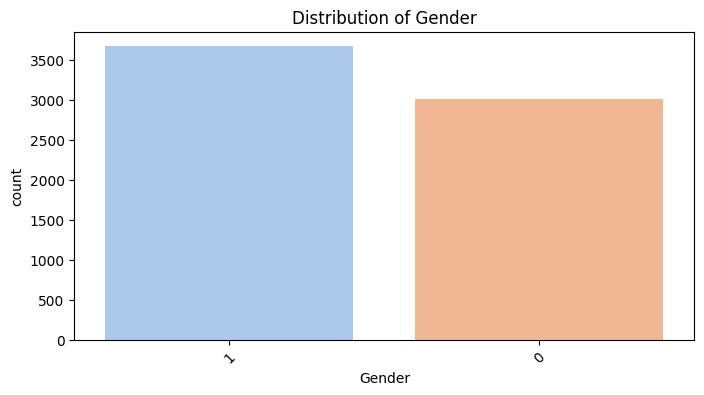

<ipython-input-13-7a5b3c761281>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="pastel")


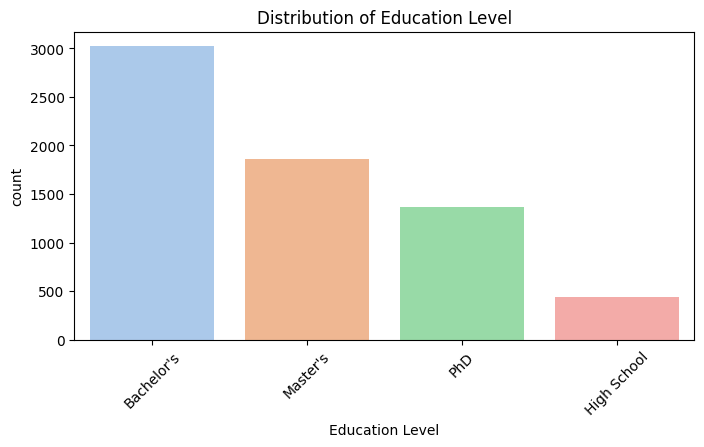

<ipython-input-13-7a5b3c761281>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="pastel")


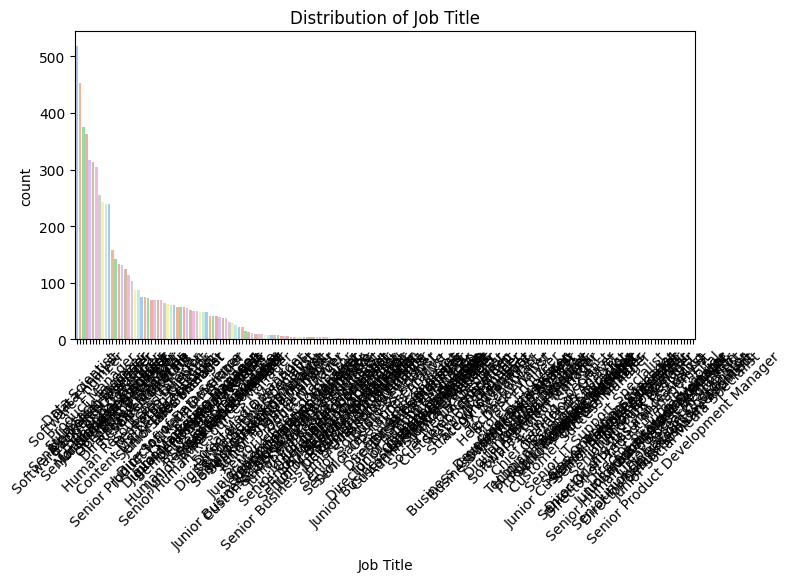

In [13]:
categorical_cols = ['Gender', 'Education Level', 'Job Title']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

## B. Distribution of Numerical Features

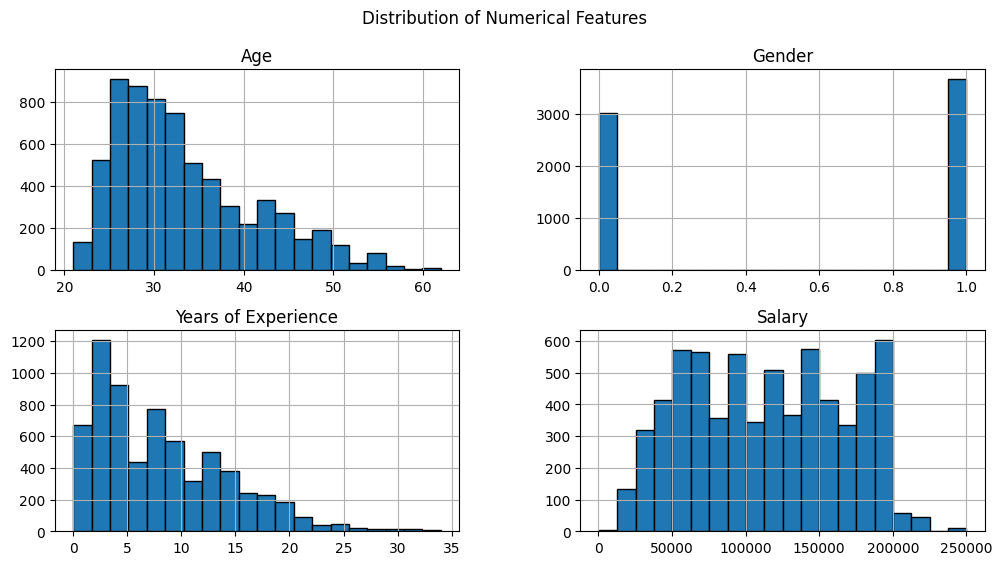

In [14]:
df.hist(figsize=(12, 6), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()

## C. Correlation Between Features

We wanted to create a heatmap with the education level included so we figured for this part, we figured to convert this categorical variable to numeric

In [15]:
# Define mapping for Education Level
education_map = {
    "High School": 0,
    "Bachelor's": 1,
    "Master's": 2,
    "PhD": 3
}

# Create a new numeric column in df
df['Education_Level_Num'] = df['Education Level'].map(education_map)

# Confirm changes
print("✅ Numeric Education Level added to df.")
print(df[['Education Level', 'Education_Level_Num']].head())

✅ Numeric Education Level added to df.
  Education Level  Education_Level_Num
0      Bachelor's                    1
1        Master's                    2
2             PhD                    3
3      Bachelor's                    1
4        Master's                    2


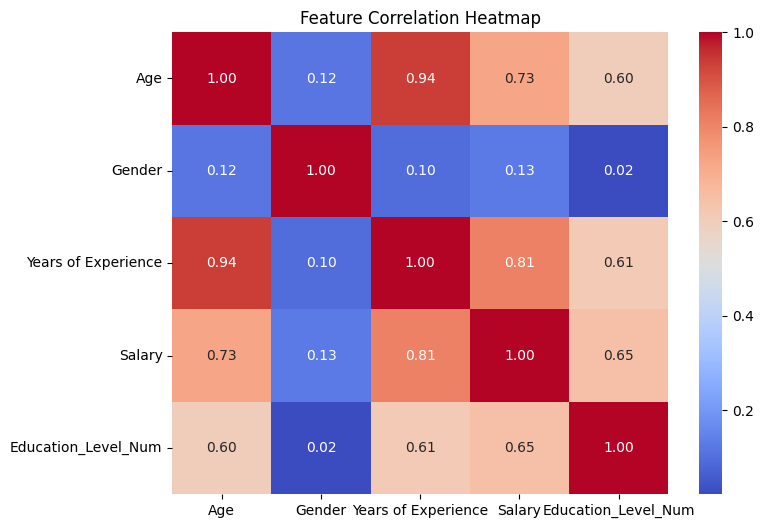

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## D. Salary Distributions

**By Education Level**

<ipython-input-17-fd543733a484>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Salary', data=df, palette='Set2')
<ipython-input-17-fd543733a484>:10: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


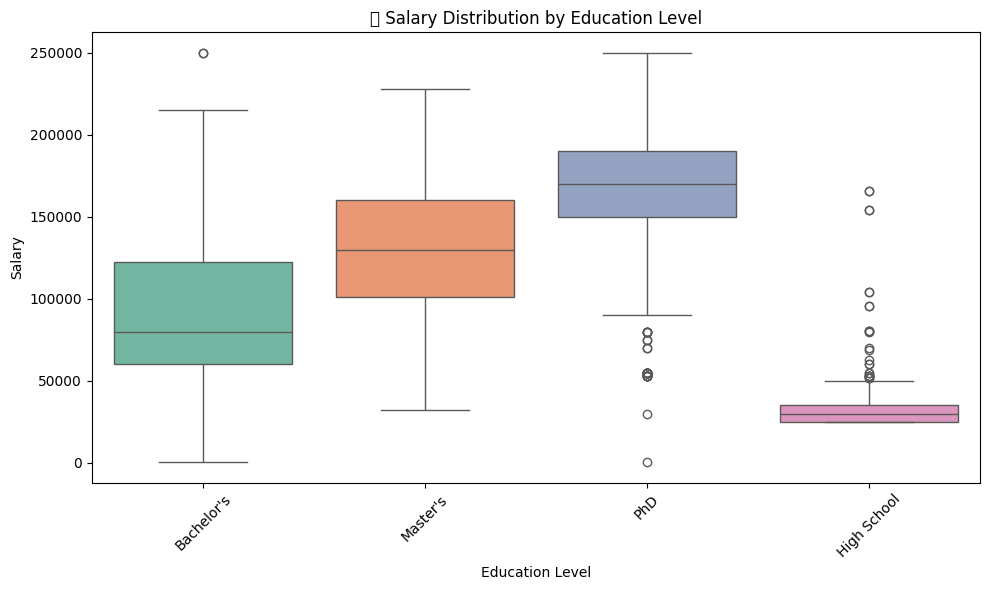

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=df, palette='Set2')
plt.title("💼 Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**By Gender**

In [18]:
# Add a display-friendly gender label column
df['Gender_Label'] = df['Gender'].map({1: 'Male', 0: 'Female'})

<ipython-input-19-8129429c8256>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Label', y='Salary', data=df, palette='pastel')
<ipython-input-19-8129429c8256>:6: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


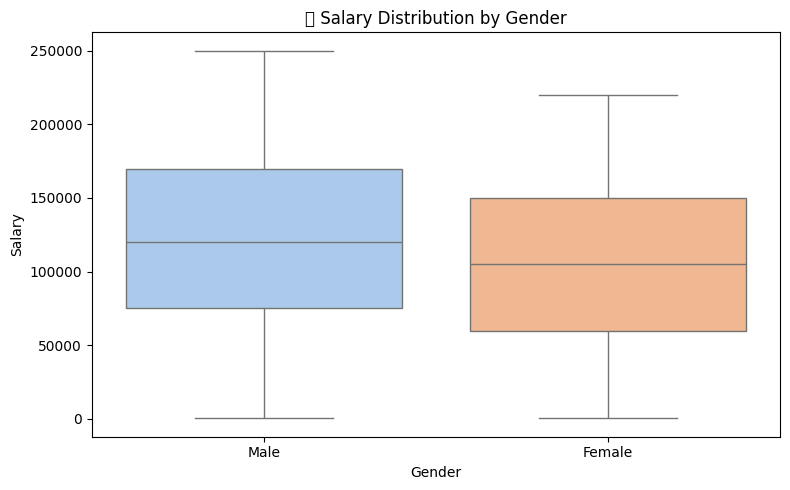

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender_Label', y='Salary', data=df, palette='pastel')
plt.title("👤 Salary Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


**Education & Gender**

<ipython-input-20-4349a6217e6e>:8: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


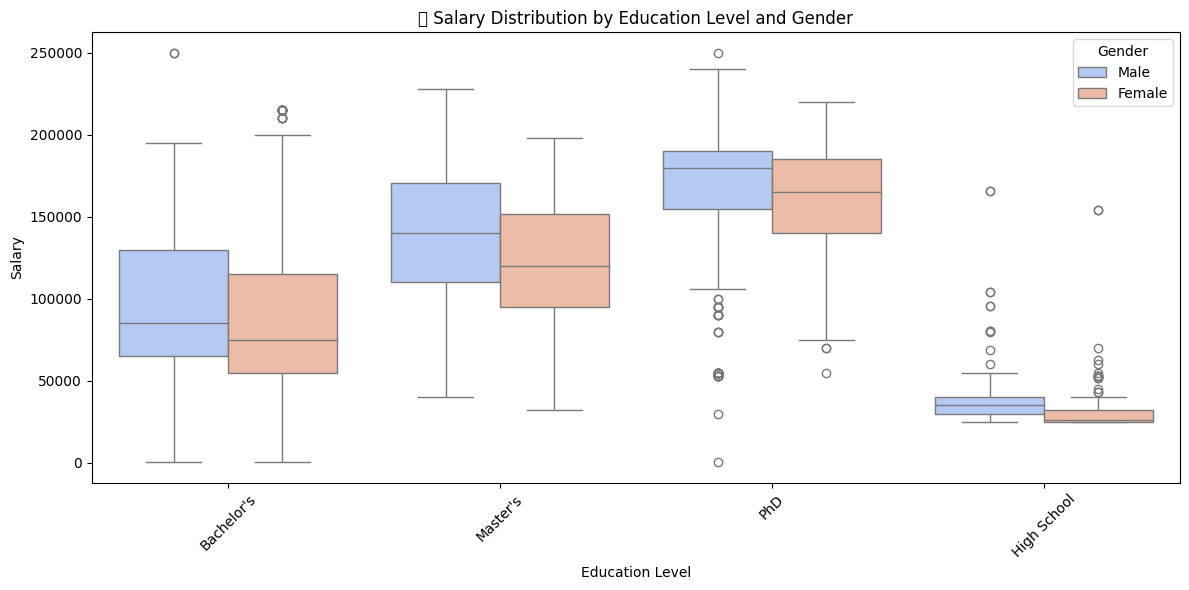

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Salary', hue='Gender_Label', data=df, palette='coolwarm')
plt.title("📚 Salary Distribution by Education Level and Gender")
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


In [21]:
# Average salary by Education
edu_salary = df.groupby("Education Level")["Salary"].mean().sort_values(ascending=False)
print("📊 Average Salary by Education Level:\n", edu_salary)

# Average salary by Gender
gender_salary = df.groupby("Gender")["Salary"].mean()
print("\n📊 Average Salary by Gender:\n", gender_salary)

# Average salary by both
combo_salary = df.groupby(["Education Level", "Gender"])["Salary"].mean()
print("\n📊 Average Salary by Education Level and Gender:\n", combo_salary)


📊 Average Salary by Education Level:
 Education Level
PhD            165651.457999
Master's       130078.384822
Bachelor's      95082.908640
High School     34415.612385
Name: Salary, dtype: float64

📊 Average Salary by Gender:
 Gender
0    107888.998672
1    121395.697630
Name: Salary, dtype: float64

📊 Average Salary by Education Level and Gender:
 Education Level  Gender
Bachelor's       0          89165.219533
                 1          98971.768513
High School      0          30756.047809
                 1          39380.751351
Master's         0         122694.542135
                 1         140060.592405
PhD              0         160266.292339
                 1         168711.071019
Name: Salary, dtype: float64


**Investigating experience vs. salary trends across different education levels.**

<ipython-input-22-118a23e76548>:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


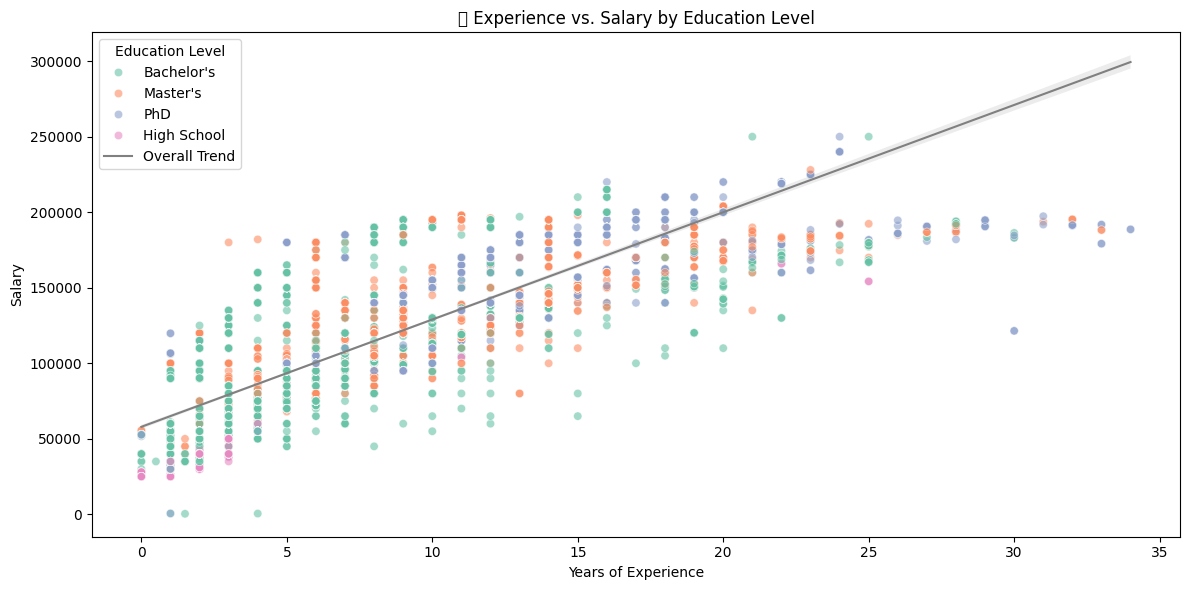

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Years of Experience',
    y='Salary',
    hue='Education Level',
    data=df,
    palette='Set2',
    alpha=0.6
)
sns.regplot(
    x='Years of Experience',
    y='Salary',
    data=df,
    scatter=False,
    color='gray',
    line_kws={"linewidth": 1.5},
    label='Overall Trend'
)
plt.title("📈 Experience vs. Salary by Education Level")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(title="Education Level")
plt.tight_layout()
plt.show()


<ipython-input-23-693a2b9a37b1>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


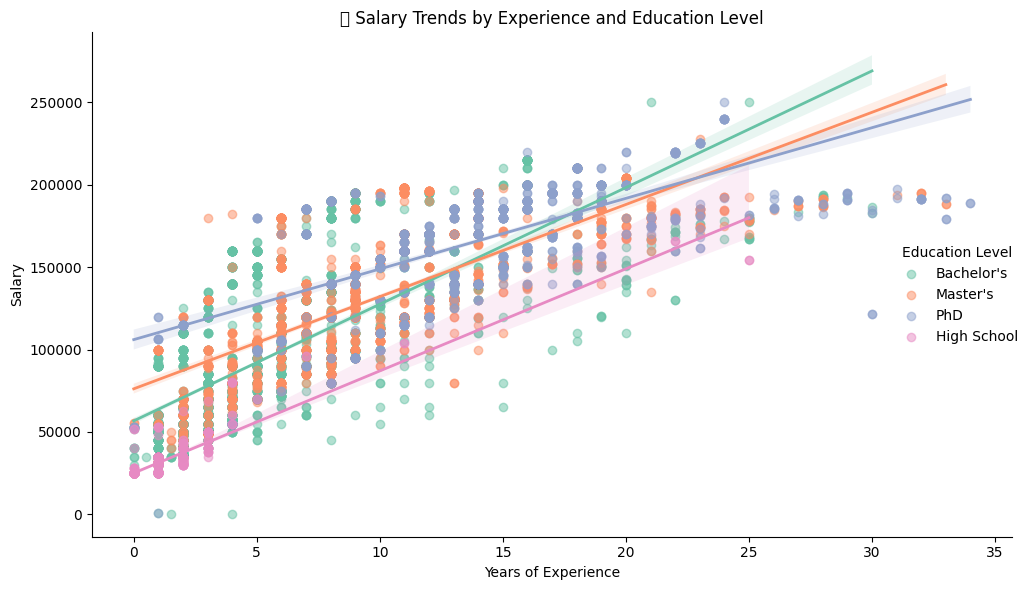

In [23]:
sns.lmplot(
    x='Years of Experience',
    y='Salary',
    hue='Education Level',
    data=df,
    height=6,
    aspect=1.5,
    palette='Set2',
    scatter_kws={'alpha': 0.5},
    line_kws={'linewidth': 2}
)
plt.title("📊 Salary Trends by Experience and Education Level")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


In [24]:
# Bucket experience
df['Experience Bin'] = pd.cut(df['Years of Experience'], bins=[0, 5, 10, 15, 20, 35], labels=['0–5', '6–10', '11–15', '16–20', '21+'])

# Group by bin and education level
exp_salary_summary = df.groupby(['Experience Bin', 'Education Level'])['Salary'].mean().unstack().round(0)

print("📊 Average Salary by Experience Bin and Education Level:\n")
print(exp_salary_summary)


📊 Average Salary by Experience Bin and Education Level:

Education Level  Bachelor's  High School  Master's       PhD
Experience Bin                                              
0–5                 75036.0      34671.0   78219.0   88583.0
6–10               120662.0      95845.0  123905.0  142838.0
11–15              140892.0     103947.0  157325.0  163163.0
16–20              177206.0          NaN  175575.0  186980.0
21+                177342.0     160063.0  182917.0  196029.0


<ipython-input-24-502c8819e899>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_salary_summary = df.groupby(['Experience Bin', 'Education Level'])['Salary'].mean().unstack().round(0)


<ipython-input-29-531bff3d8764>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_summary = df.groupby(['Experience Bin', 'Education Level'])['Salary'].mean().reset_index()
<ipython-input-29-531bff3d8764>:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


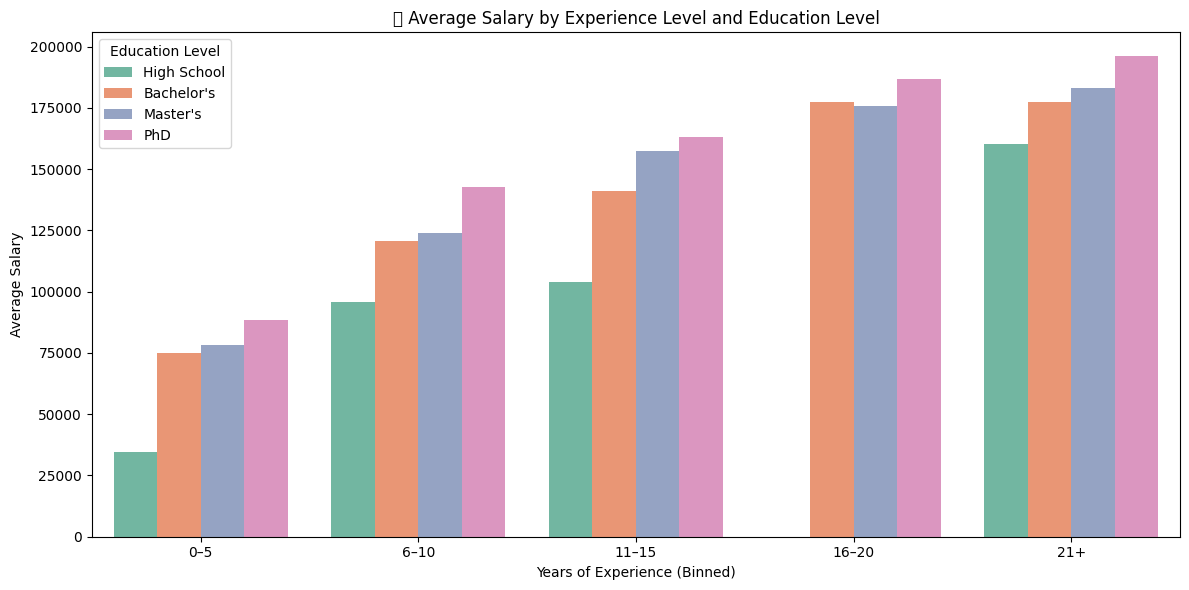

In [29]:



# 1. Create experience bins
df['Experience Bin'] = pd.cut(
    df['Years of Experience'],
    bins=[0, 5, 10, 15, 20, 35],
    labels=['0–5', '6–10', '11–15', '16–20', '21+']
)

# 2. Calculate average salary by experience bin and education level
salary_summary = df.groupby(['Experience Bin', 'Education Level'])['Salary'].mean().reset_index()

# 3. Create grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=salary_summary,
    x='Experience Bin',
    y='Salary',
    hue='Education Level',
    palette='Set2',
    hue_order=['High School', "Bachelor's", "Master's", "PhD"]
)

# 4. Style the plot
plt.title("📊 Average Salary by Experience Level and Education Level")
plt.xlabel("Years of Experience (Binned)")
plt.ylabel("Average Salary")
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()


<ipython-input-32-98c402a7b8d6>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['Experience Bin', 'EduGender'])['Salary'].mean().reset_index()
<ipython-input-32-98c402a7b8d6>:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


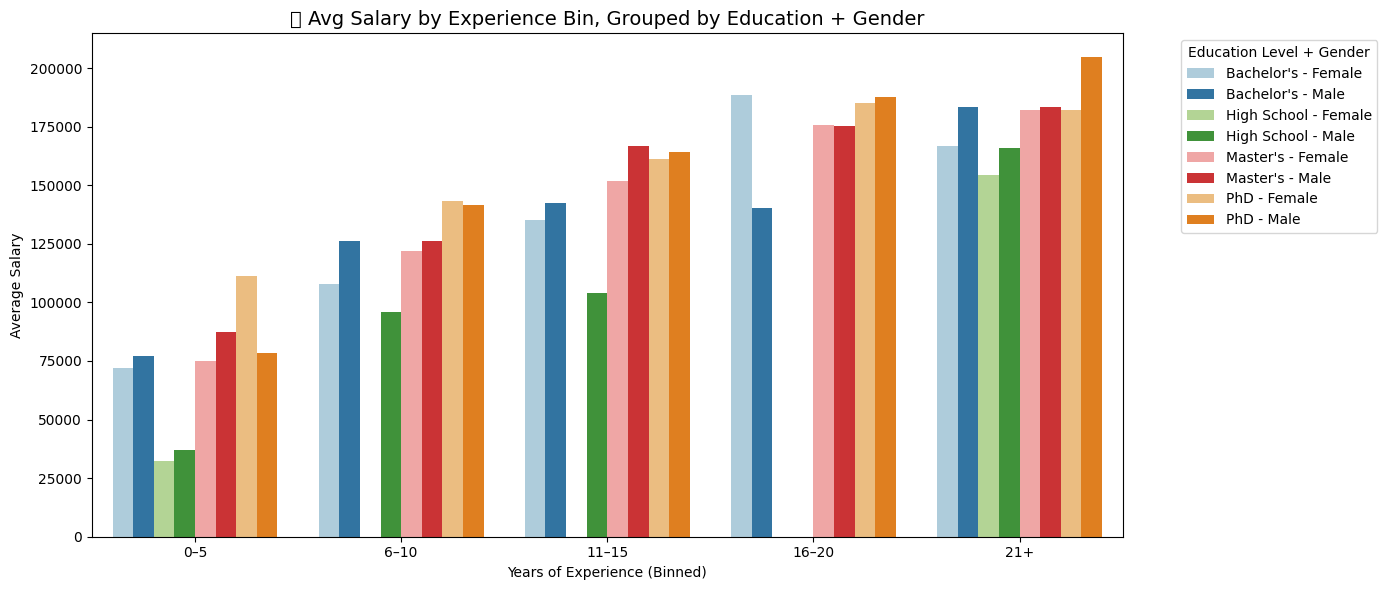

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create experience bins
df['Experience Bin'] = pd.cut(
    df['Years of Experience'],
    bins=[0, 5, 10, 15, 20, 35],
    labels=['0–5', '6–10', '11–15', '16–20', '21+']
)

# 2. Map numeric gender back to labels
df['Gender_Label'] = df['Gender'].map({1: 'Male', 0: 'Female'})

# 3. Combine Education + Gender for grouped bar labels
df['EduGender'] = df['Education Level'] + ' - ' + df['Gender_Label']

# 4. Group by experience bin and EduGender
summary = df.groupby(['Experience Bin', 'EduGender'])['Salary'].mean().reset_index()

# 5. Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=summary,
    x='Experience Bin',
    y='Salary',
    hue='EduGender',
    palette='Paired'
)

# 6. Style
plt.title("📊 Avg Salary by Experience Bin, Grouped by Education + Gender", fontsize=14)
plt.xlabel("Years of Experience (Binned)")
plt.ylabel("Average Salary")
plt.legend(title="Education Level + Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## E. Further Data Processing

**Feature Engineering: Job Title Consolidation**

In [36]:
# Step 1: Clean job titles
df['Job Title Clean'] = df['Job Title'].str.strip().str.lower()

# Step 2: Expanded keyword-to-industry mapping
job_title_to_industry = {
    # Tech
    'software engineer': 'Tech',
    'developer': 'Tech',
    'web developer': 'Tech',
    'it support': 'Tech',
    'it support specialist': 'Tech',
    'network engineer': 'Tech',
    'technical support specialist': 'Tech',
    'help desk analyst': 'Tech',
    'technical writer': 'Tech',
    'data scientist': 'Tech',
    'data analyst': 'Tech',
    'data engineer': 'Tech',
    'full stack engineer': 'Tech',
    'software manager': 'Tech',
    'senior software architect': 'Tech',
    'it consultant': 'Tech',

    # Management
    'project manager': 'Management',
    'operations manager': 'Management',
    'product manager': 'Management',
    'program manager': 'Management',
    'strategy consultant': 'Management',
    'senior consultant': 'Management',
    'senior project coordinator': 'Management',
    'operations analyst': 'Management',
    'business operations analyst': 'Management',
    'office manager': 'Management',
    'receptionist': 'Management',

    # Marketing
    'marketing analyst': 'Marketing',
    'marketing manager': 'Marketing',
    'marketing specialist': 'Marketing',
    'digital marketing manager': 'Marketing',
    'digital content producer': 'Marketing',
    'content marketing manager': 'Marketing',
    'social media specialist': 'Marketing',
    'social media manager': 'Marketing',
    'social media man': 'Marketing',
    'copywriter': 'Marketing',
    'junior marketing analyst': 'Marketing',
    'junior marketing manager': 'Marketing',
    'junior marketing specialist': 'Marketing',
    'junior advertising coordinator': 'Marketing',
    'digital marketing specialist': 'Marketing',
    'product marketing manager': 'Marketing',
    'senior marketing analyst': 'Marketing',
    'senior marketing manager': 'Marketing',
    'senior marketing specialist': 'Marketing',

    # HR
    'hr manager': 'HR',
    'recruiter': 'HR',
    'technical recruiter': 'HR',
    'hr generalist': 'HR',
    'senior hr manager': 'HR',
    'senior hr generalist': 'HR',
    'junior hr generalist': 'HR',
    'junior hr coordinator': 'HR',
    'junior recruiter': 'HR',
    'junior customer support specialist': 'HR',
    'senior hr specialist': 'HR',
    'junior hr coordinator': 'HR',
    'human resources coordinator': 'HR',
    'human resources manager': 'HR',
    'senior human resources manager': 'HR',
    'senior human resources coordinator': 'HR',
    'senior human resources specialist': 'HR',
    'juniour hr generalist': 'HR',
    'juniour hr coordinator': 'HR',

    # Customer Support / Sales
    'customer service rep': 'Customer Support',
    'customer service representative': 'Customer Support',
    'customer service manager': 'Customer Support',
    'customer success rep': 'Customer Support',
    'customer success manager': 'Customer Support',
    'sales associate': 'Sales',
    'sales executive': 'Sales',
    'sales representative': 'Sales',
    'sales manager': 'Sales',
    'junior sales representative': 'Sales',
    'junior sales associate': 'Sales',
    'senior sales manager': 'Sales',
    'senior sales representative': 'Sales',
    'account manager': 'Sales',
    'senior account manager': 'Sales',
    'junior account manager': 'Sales',
    'senior account executive': 'Sales',
    'business development manager': 'Sales',
    'senior business development manager': 'Sales',

    # Finance
    'financial analyst': 'Finance',
    'financial advisor': 'Finance',
    'financial manager': 'Finance',
    'senior financial advisor': 'Finance',
    'senior financial manager': 'Finance',
    'junior financial advisor': 'Finance',

    # Design
    'product designer': 'Design',
    'ux designer': 'Design',
    'ux researcher': 'Design',
    'graphic designer': 'Design',
    'junior ux designer': 'Design',
    'senior ux designer': 'Design',
    'junior web designer': 'Design',
    'junior designer': 'Design',
    'senior product designer': 'Design',
    'senior graphic designer': 'Design',

    # Science / Research
    'research scientist': 'Research',
    'senior scientist': 'Research',
    'principal scientist': 'Research',
    'senior research scientist': 'Research',
    'senior researcher': 'Research',
    'junior research scientist': 'Research',

    # Engineering
    'senior engineer': 'Engineering',
    'project engineer': 'Engineering',
    'principal engineer': 'Engineering',
    'senior project engineer': 'Engineering',

    # Product
    'senior product manager': 'Product',
    'junior product manager': 'Product',
    'senior product marketing manager': 'Product',
    'product marketing manager': 'Product',
    'product designer': 'Product',

    # Logistics
    'supply chain manager': 'Logistics',
    'supply chain analyst': 'Logistics',
    'delivery driver': 'Logistics',
    'operations coordinator': 'Logistics',
    'junior operations analyst': 'Logistics',
    'junior operations coordinator': 'Logistics',
    'senior operations analyst': 'Logistics',
    'senior operations coordinator': 'Logistics',

    # Executive
    'chief technology officer': 'Executive',
    'chief data officer': 'Executive',
    'ceo': 'Executive',
    'cto': 'Executive',

    # Training / Learning
    'training specialist': 'Learning',
    'senior training specialist': 'Learning',

    # PR / Events
    'event coordinator': 'PR',
    'public relations manager': 'PR',

    # Uncategorized fallback
    'other': 'Other'
}

# Step 3: Categorize using keyword matching
def categorize_industry(job):
    job = job.lower()
    for keyword in job_title_to_industry:
        if keyword in job:
            return job_title_to_industry[keyword]
    return 'Other'

# Apply to dataframe
df['Job Industry Category'] = df['Job Title Clean'].apply(categorize_industry)

# Preview result
print("✅ Job Industry Category Assignment:")
print(df['Job Industry Category'].value_counts())


✅ Job Industry Category Assignment:
Job Industry Category
Tech                3238
Marketing            701
Management           557
Executive            445
Sales                399
HR                   353
Engineering          320
Other                211
Finance              197
Research             124
Product               80
Design                31
Logistics             12
Customer Support      11
PR                     3
Learning               2
Name: count, dtype: int64


**Feature Engineering: Seniority Consolidation**

In [37]:
# Map seniority based on keywords
def get_seniority(title):
    title = title.lower()
    if 'junior' in title:
        return 'Junior'
    elif 'senior' in title:
        return 'Senior'
    elif 'lead' in title or 'manager' in title or 'director' in title:
        return 'Mid-Senior'
    elif 'vp' in title or 'chief' in title or 'ceo' in title or 'cto' in title:
        return 'Executive'
    else:
        return 'Mid-Level'

# Apply it
df['Seniority Level'] = df['Job Title Clean'].apply(get_seniority)

# Check the result
print("✅ Job Title Consolidated into Seniority Levels:")
print(df['Seniority Level'].value_counts())


✅ Job Title Consolidated into Seniority Levels:
Seniority Level
Mid-Level     3178
Mid-Senior    1969
Senior         959
Junior         573
Executive        5
Name: count, dtype: int64


<ipython-input-39-1da002d5f18a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_counts, y='Job Industry Category', x='Count', palette='Set2')
<ipython-input-39-1da002d5f18a>:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


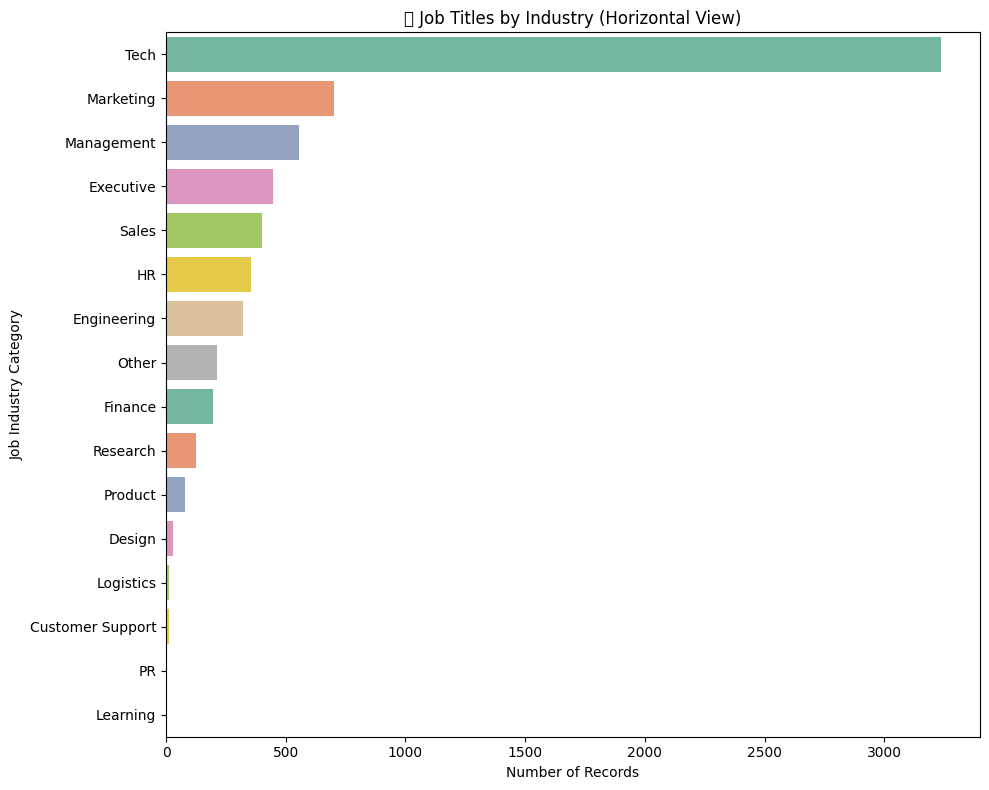

In [39]:
plt.figure(figsize=(10, 8))
sns.barplot(data=industry_counts, y='Job Industry Category', x='Count', palette='Set2')
plt.title("📊 Job Titles by Industry (Horizontal View)")
plt.xlabel("Number of Records")
plt.ylabel("Job Industry Category")
plt.tight_layout()
plt.show()


FROM THIS WE DECIDED TO FOCUS OUR ANALYSIS ON THE FOLLOWING JOB INDUSTRY CATEGORIES: TECH, MANAGEMENT, EXECUTIVE, ENGINEERING, FINANCE, AND RESEARCH